# 강의안 11. 모형 타당성 검토 (Model validation)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##  iris data 읽어들여 분석하기

In [2]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## 지도학습: test 데이터셋을 이용한 타당성 검증

In [3]:
# 1. Choose a class of model : GaussianNB
from sklearn.naive_bayes import GaussianNB

In [4]:
GNB = GaussianNB()

In [5]:
#  3. Arrange data set: split training and test sets
X_iris = iris.drop('species', axis =1)
y_iris = iris['species']

#### training, test 데이터 셋 구분하기

In [6]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris)

In [7]:
Xtrain

,sepal_length,sepal_width,petal_length,petal_width
91,6.1,3.0,4.6,1.4
48,5.3,3.7,1.5,0.2
46,5.1,3.8,1.6,0.2
74,6.4,2.9,4.3,1.3
7,5.0,3.4,1.5,0.2
...,...,...,...,...
114,5.8,2.8,5.1,2.4
87,6.3,2.3,4.4,1.3
61,5.9,3.0,4.2,1.5
86,6.7,3.1,4.7,1.5


In [8]:
ytrain

91     versicolor
48         setosa
46         setosa
74     versicolor
7          setosa
          ...    
114     virginica
87     versicolor
61     versicolor
86     versicolor
80     versicolor
Name: species, Length: 112, dtype: object

In [9]:
Xtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 33 to 6
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  38 non-null     float64
 1   sepal_width   38 non-null     float64
 2   petal_length  38 non-null     float64
 3   petal_width   38 non-null     float64
dtypes: float64(4)
memory usage: 1.5 KB


#### train 데이터셋을 이용한 모형 학습

In [10]:
GNB.fit(Xtrain, ytrain)

GaussianNB()

In [11]:
ytrain_pred = GNB.predict(Xtrain)

#### training dataset 내에서 accuracy 분석하기

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(ytrain, ytrain_pred)

0.9732142857142857

In [13]:
# training dataset 내에서 score()메서드를 이용하여 accuracy 계산하기
GNB.score(Xtrain, ytrain)

0.9732142857142857

#### test dataset에서 예측하고 accuracy 분석하기

In [14]:
# 5. Predict labels for unknown(test) data 
ypred = GNB.predict(Xtest)
from sklearn.metrics import accuracy_score
accuracy_score(ytest, ypred)

0.9473684210526315

### 교차 타당성 분석 (Cross Validation)

In [15]:
from sklearn.model_selection import cross_validate, cross_val_score

In [16]:
GNB = GaussianNB()

In [17]:
scores = cross_val_score(GNB, X_iris, y_iris)
scores

array([0.93333333, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [18]:
scores.mean()

0.9533333333333334

In [19]:
scores = cross_val_score(GNB, X_iris, y_iris, cv=10)
scores

array([0.93333333, 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.93333333, 0.86666667, 1.        , 1.        , 1.        ])

In [20]:
scores.mean()

0.9533333333333334

## Hyperparameter 설정에 대한 모형의 타당성 검토

### 지도 학습: classcificaiton of Iris dataset without test data set

In [21]:
from sklearn.neighbors import KNeighborsClassifier    # choose model class: 분류를 위하여 Knn 방법을 사용함 

In [22]:
knn = KNeighborsClassifier()                            # Initiate a model: n_neighbors =5 (default)

In [23]:
knn.fit(X_iris, y_iris)                               # fit the model with data with labels!

KNeighborsClassifier()

In [24]:
y_pred = knn.predict(X_iris)                         
y_pred

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
     

모델의 성능을 검증하기 위하여 metrics모듈의 accuracy_score 함수를 사용함

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
accuracy_score(y_iris, y_pred)

0.9666666666666667

hyperparameter n_neighbor=1로 설정한 경우 모형의 성능을 비교함

In [27]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_iris, y_iris)
y_pred = knn.predict(X_iris)
accuracy_score(y_iris, y_pred)

1.0

hyperparameter n_neighbor=15로 설정한 경우 모형의 성능을 비교함

In [28]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_iris, y_iris)
y_pred = knn.predict(X_iris)
accuracy_score(y_iris, y_pred)

0.9866666666666667

### Model Validation by Train -Test data split 

train 데이터셋과 test 데이터셋을 구분하기 위하여 model_selection 모듈의 train_test_split 함수를 사용함

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris)

hyperparameter n_neighbor=5로 설정한 경우

In [30]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.9736842105263158

hyperparameter n_neighbor=1로 설정한 경우

In [31]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.9210526315789473

hyperparameter n_neighbor=15로 설정한 경우

In [32]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.9736842105263158

hyperparameter n_neighbor=5로 설정한 경우 (여러번 반복할 경우 accuracy값이 다르게 나타난다.)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.9736842105263158

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.9473684210526315

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.9473684210526315

### Cross Validation

In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
knn = KNeighborsClassifier(n_neighbors=5)
cross_val_score(knn, X_iris, y_iris, cv=5)

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [38]:
cross_val_score(knn, X_iris, y_iris, cv=5).mean()

0.9733333333333334

In [39]:
knn = KNeighborsClassifier(n_neighbors=1)
cross_val_score(knn, X_iris, y_iris, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [40]:
cross_val_score(knn, X_iris, y_iris, cv=5).mean()

0.96

In [41]:
knn = KNeighborsClassifier(n_neighbors=15)
cross_val_score(knn, X_iris, y_iris, cv=5)

array([0.93333333, 1.        , 0.93333333, 0.96666667, 1.        ])

In [42]:
cross_val_score(knn, X_iris, y_iris, cv=5).mean()

0.9666666666666668

## Decision Tree

In [43]:
from sklearn import tree

iris 데이터셋에 decision tree 방식을 적용함

In [44]:
DT = tree.DecisionTreeClassifier()
DT.fit(X_iris, y_iris)

DecisionTreeClassifier()

In [45]:
DT.score(X_iris, y_iris)

1.0

[Text(0.5, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini

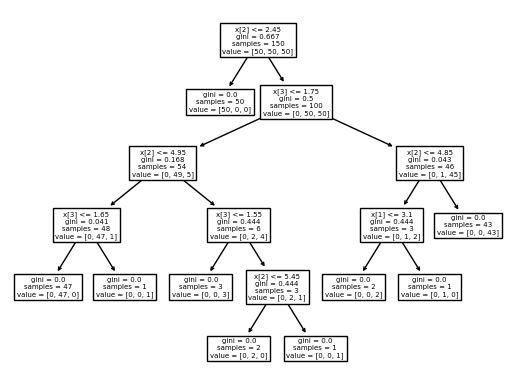

In [46]:
tree.plot_tree(DT)

train-test 데이터셋을 구분하여 예측 정확도를 파악함

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris)

In [48]:
DT = tree.DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [49]:
DT.score(X_train, y_train)

1.0

In [50]:
DT.score(X_test, y_test)

0.9210526315789473

#### max_leaf_nodes 매개변수를 지정한 경우 (overfitting을 방지)

In [51]:
DT = tree.DecisionTreeClassifier(max_leaf_nodes=5)
DT.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=5)

In [52]:
DT.score(X_train, y_train)

1.0

In [53]:
DT.score(X_test, y_test)

0.9210526315789473

Cross Validation  방법을 이용한 결과

In [54]:
DT = tree.DecisionTreeClassifier()
cross_val_score(DT, X_iris, y_iris, cv=5)

array([0.96666667, 0.96666667, 0.9       , 1.        , 1.        ])

In [55]:
cross_val_score(DT, X_iris, y_iris, cv=5).mean()

0.9666666666666668

##  RandomForests

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
RF = RandomForestClassifier()
RF.fit(X_iris, y_iris)

RandomForestClassifier()

In [58]:
RF.score(X_iris, y_iris)

1.0

train-test 데이터셋을 이용한 경우

In [59]:
RF= RandomForestClassifier()
RF.fit(X_train, y_train)

RandomForestClassifier()

In [60]:
RF.score(X_test, y_test)

0.8947368421052632

Cross Validation 방식을 이용한 경우

In [61]:
RF = RandomForestClassifier()
cross_val_score(RF, X_iris, y_iris, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.96666667, 1.        ])

In [62]:
cross_val_score(RF, X_iris, y_iris, cv=5).mean()

0.9533333333333334

## Confusion Matrix

In [63]:
from sklearn.datasets import load_breast_cancer

In [64]:
cancer = load_breast_cancer(as_frame=True)

In [65]:
X = cancer.data
y = cancer.target

In [66]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [67]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [68]:
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [69]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32

In [70]:
y.value_counts()

1    357
0    212
Name: target, dtype: int64

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [73]:
X_train.shape

(455, 30)

In [74]:
X_test.shape

(114, 30)

In [75]:
y_train.shape

(455,)

In [76]:
y_test.shape

(114,)

### logistic regression을 이용한 classification

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.967032967032967

In [79]:
lr.score(X_test, y_test)

0.9298245614035088

### compute confusion_matrix

In [80]:
ypred = lr.predict(X_test)

In [81]:
from sklearn.metrics import confusion_matrix

In [82]:
cm = confusion_matrix(y_test, ypred)
cm

array([[42,  5],
       [ 3, 64]], dtype=int64)

In [83]:
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]

In [84]:
print("Accuracy : ", (TP+TN)/(TP+FP+TN+FN))

Accuracy :  0.9298245614035088


In [85]:
print("Recall(Sensitivity) : ", TP/(FN+TP))

Recall(Sensitivity) :  0.9552238805970149


In [86]:
print("Precision : ", TP/(FP+TP))

Precision :  0.927536231884058
